Кирилл Лалаянц, R33352

1. Правильно ли указывать, что y в м?
2. вне зависимости от мод все системы при начале в 0 остаются в 0

# Лабораторная работа No1 
## Переходные процессы, свободное движение, устойчивость

Импорт необходимых для работы библиотек. 

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import control 
import sympy
import os

SAVE_PATH = 'tex-report/figs/'
os.makedirs(SAVE_PATH, exist_ok=True)

sympy.init_printing()

Ввод данных варианта.

In [2]:
var_num = 6

task2_f = lambda x: np.cos(5*x) + np.exp(x) + np.exp(-5 * x)

### Задание 1. Свободное движение.

2. устойчивой и неустойчивой апериодическим модам;

In [113]:
p = sympy.Symbol("p")


def task1_output(m1, m2, ts, plot_name, save_name):
    poly = sympy.simplify((p - m1) * (p - m2))
    coeffs = sympy.Poly(poly, p).all_coeffs()
    print(f'Polynom: {poly} = {poly.expand()}; coeffs = {coeffs}')
    
    ss = control.tf2ss(control.tf(1, np.array(coeffs, dtype=np.float64)))
    ss_reachable = control.canonical_form(ss, form="reachable")[0]
    print(f"SS: {ss_reachable}")

    tf2_y_0_0 = control.forced_response(ss_reachable, U=0, X0=[0, 0], T=ts)
    tf2_y_1_1 = control.forced_response(ss_reachable, U=0, X0=[0.1, 0.1], T=ts)
    plot_task1(tf2_y_0_0, tf2_y_1_1, ts, plot_name, save_name)
    

def plot_task1(tf2_y_0_0, tf2_y_1_1, ts, plot_name, save_name):
    # Построение графиков
    fig, axs = plt.subplots(1, 2, figsize=(25, 7.5))
    fig.suptitle(f"Задание 1. Свободное движение. \n {plot_name}", fontsize=20)

    axs[0].plot(ts, tf2_y_0_0.outputs, 'b', label = '(0, 0) - начальные условия')
    axs[0].plot(ts, tf2_y_1_1.outputs, 'r--', label = '(0.1, 0.1) - начальные условия')
    axs[0].set_title(f"y = y(t)", fontsize=20)
    axs[0].set_xlabel(f"t, [c]", fontsize=20)
    axs[0].set_ylabel(f"y, [м]", fontsize=20)
    axs[0].grid(True)
    axs[0].legend(prop={'size': 20})
    
    axs[1].plot(ts, tf2_y_0_0.states[0], "b", label = '(0, 0) - начальные условия')
    axs[1].plot(ts, tf2_y_1_1.states[0], "r--", label = '(0.1, 0.1) - начальные условия')
    axs[1].set_title(r"$\dot{y} = \dot{y}(t)$", fontsize=20)
    axs[1].set_xlabel(f"t, [c]", fontsize=20)
    axs[1].set_ylabel(r"$\dot{y}$, [м / с]", fontsize=20)
    axs[1].grid(True)
    axs[1].legend(prop={'size': 20})
    
    plt.savefig(f'{SAVE_PATH}/{save_name}')
    plt.show()
    

Polynom: p**2 - 1 = p**2 - 1; coeffs = [1, 0, -1]
SS: A = [[-0.  1.]
     [ 1.  0.]]

B = [[1.]
     [0.]]

C = [[-0.  1.]]

D = [[0.]]



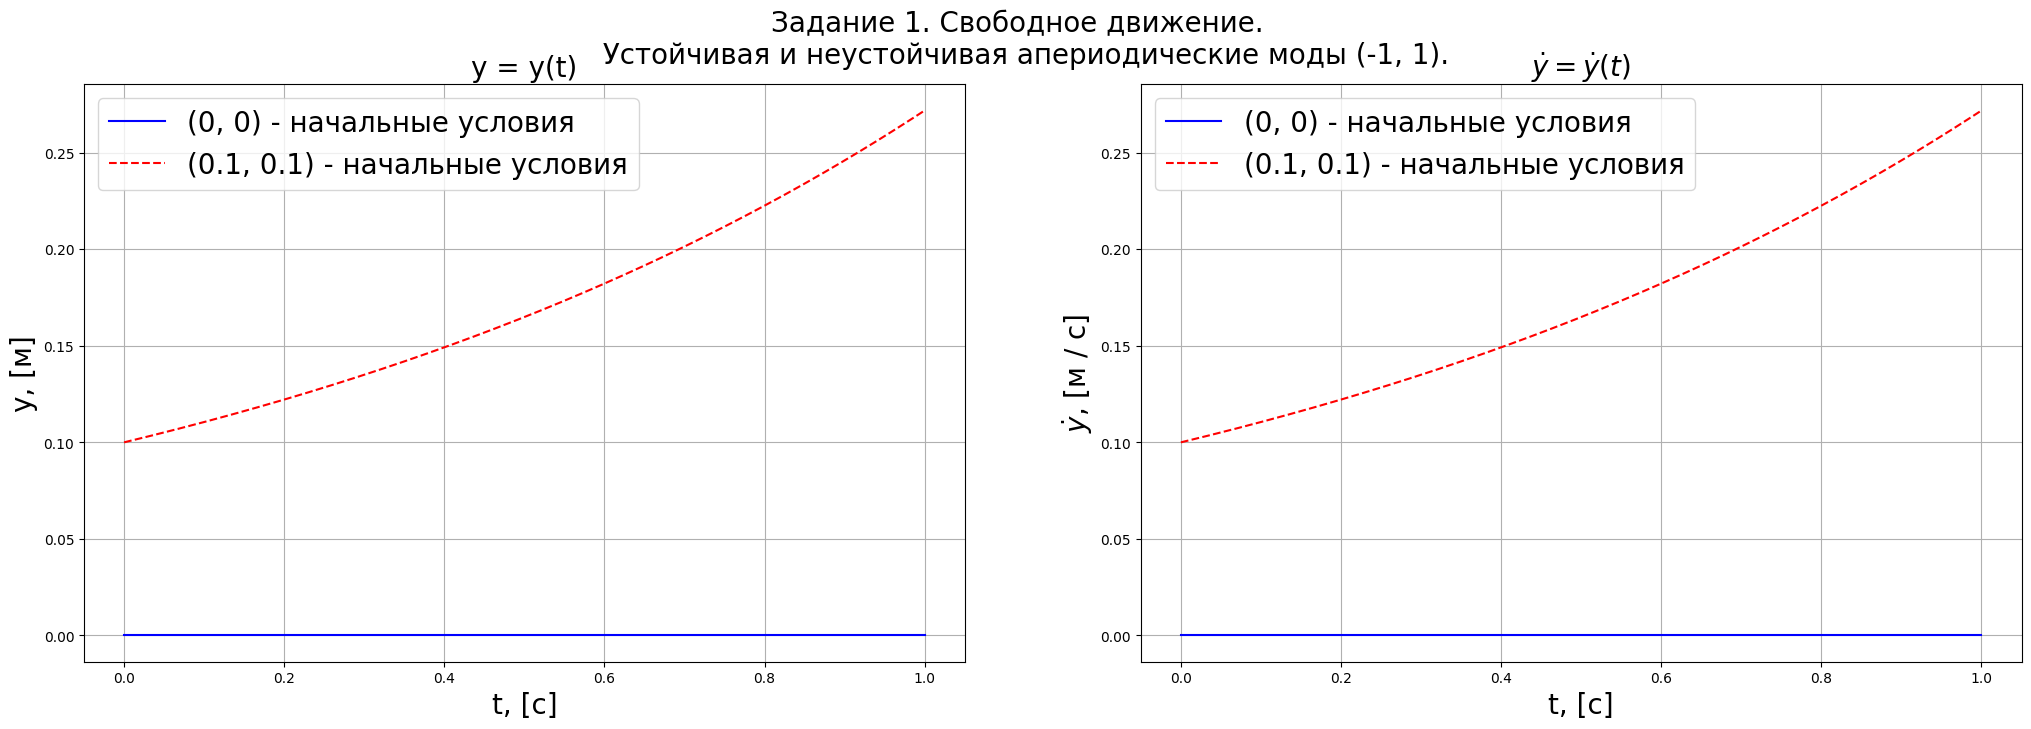

In [114]:
dt = 0.001 
max_t = 1 
ts = np.linspace(0, max_t, int(max_t / dt))

m20, m21 = -1, 1
task1_output(m20, m21, ts, plot_name = f'Устойчивая и неустойчивая апериодические моды {m20, m21}.', save_name = 'task1_2.jpg')

Polynom: p*(p - 1) = p**2 - p; coeffs = [1, -1, 0]
SS: A = [[ 1. -0.]
     [ 1.  0.]]

B = [[1.]
     [0.]]

C = [[-0.  1.]]

D = [[0.]]



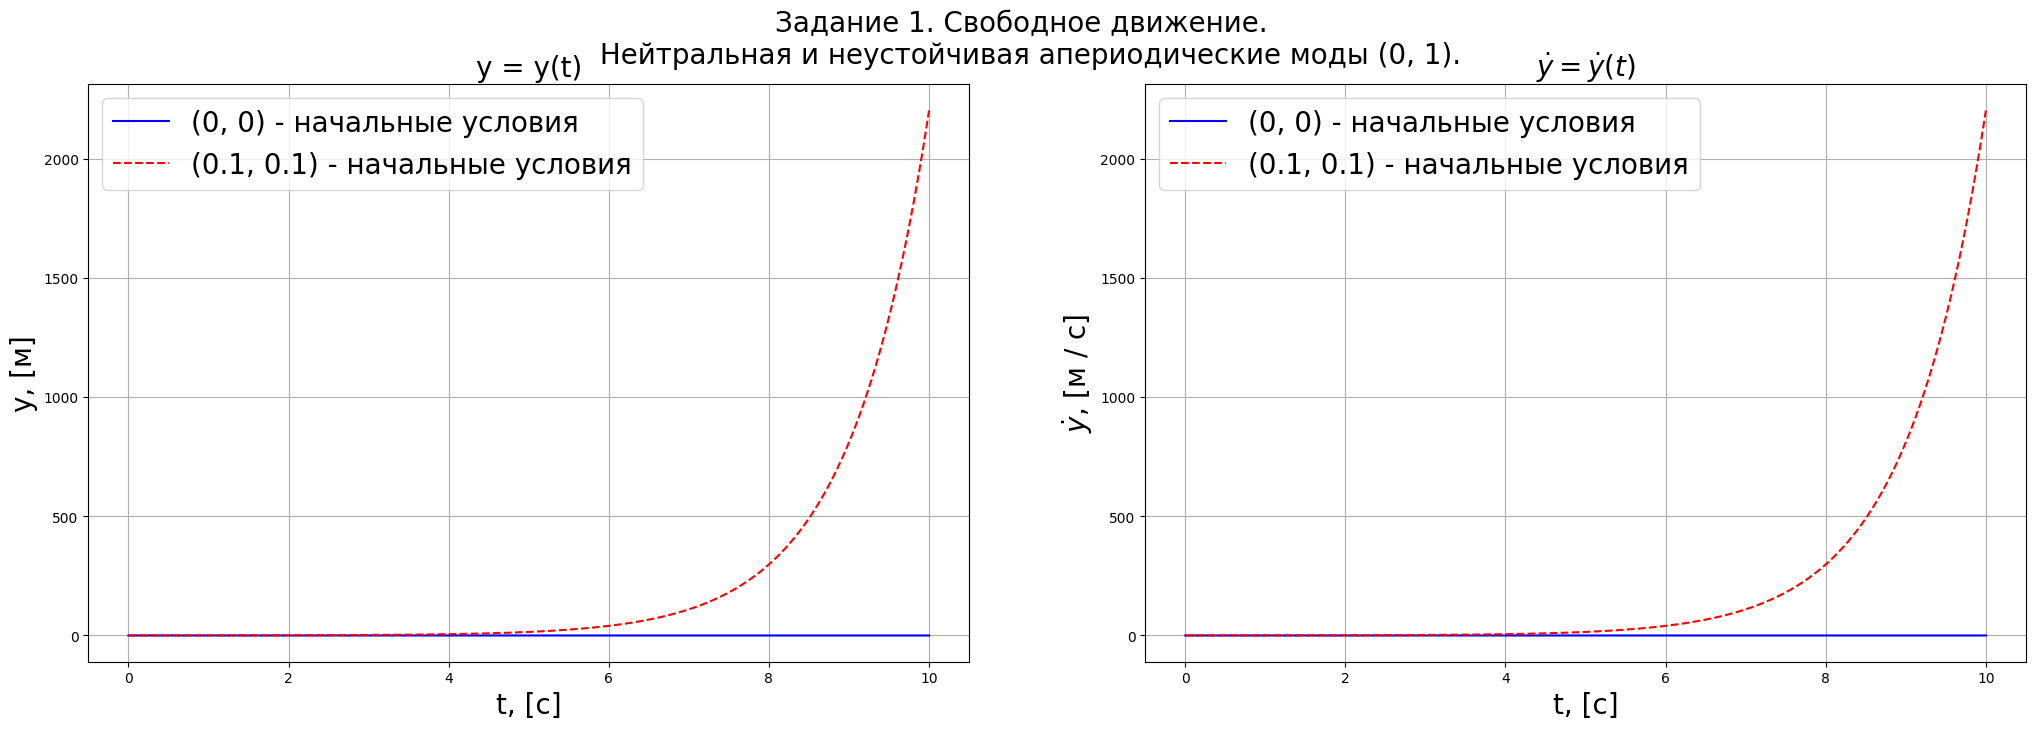

In [115]:
dt = 0.001 
max_t = 10
ts = np.linspace(0, max_t, int(max_t / dt))
m40, m41 = 0, 1

task1_output(m40, m41, ts, plot_name = f'Нейтральная и неустойчивая апериодические моды {m40, m41}.', save_name = 'task1_4.jpg')

Polynom: p**2 + 1 = p**2 + 1; coeffs = [1, 0, 1]
SS: A = [[-0. -1.]
     [ 1.  0.]]

B = [[1.]
     [0.]]

C = [[-0.  1.]]

D = [[0.]]



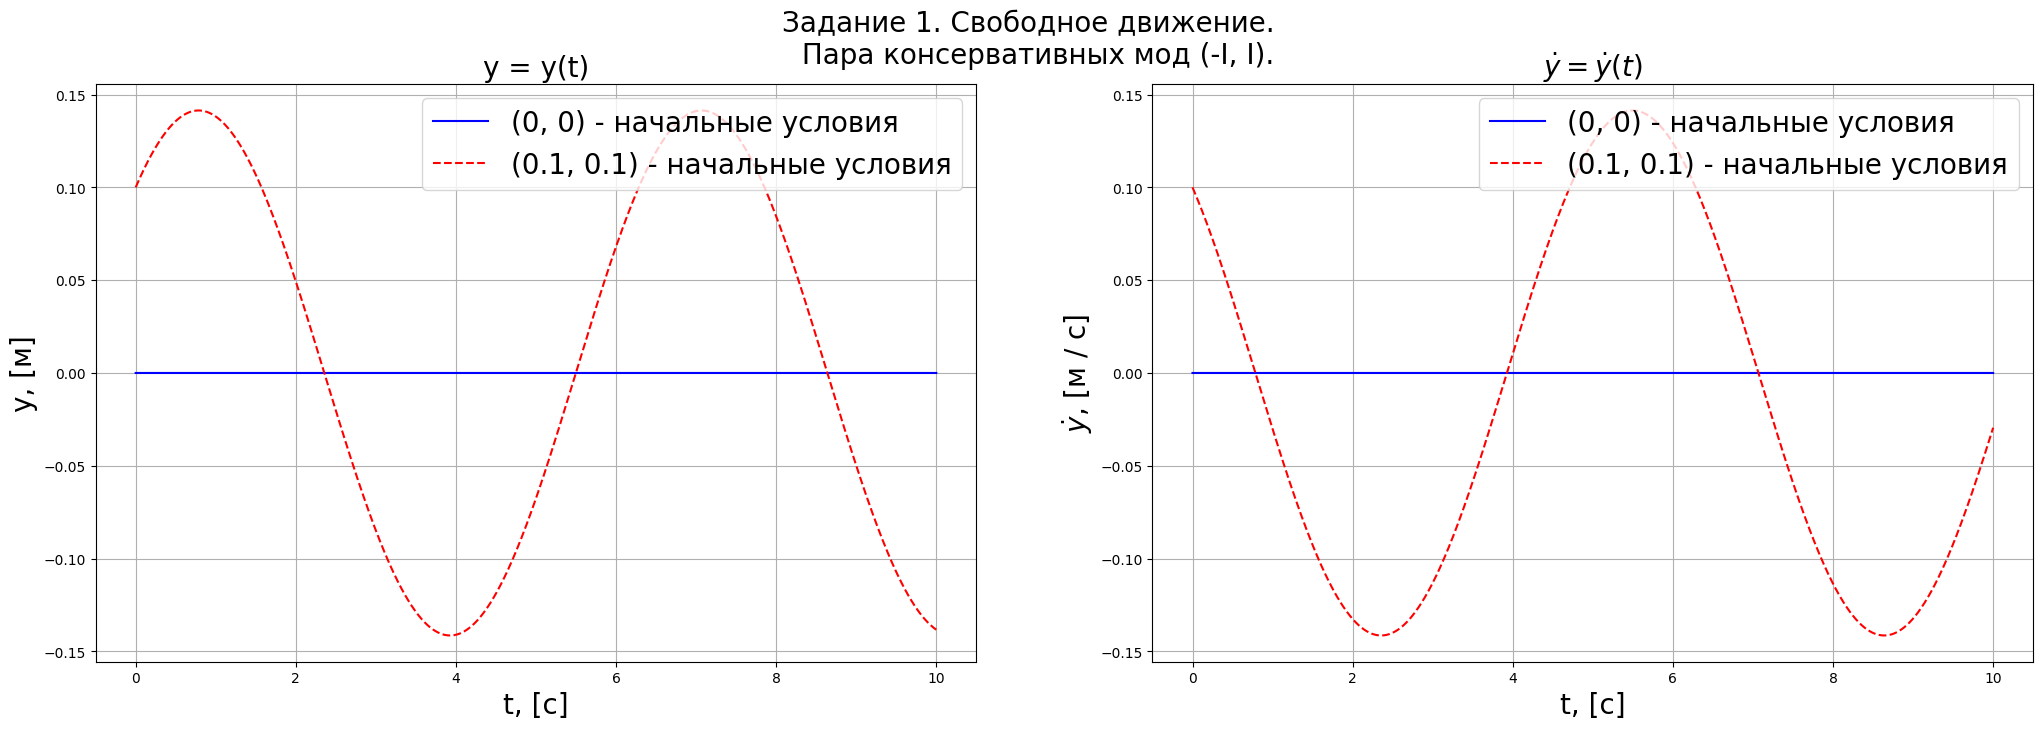

In [116]:
dt = 0.001 
max_t = 10
ts = np.linspace(0, max_t, int(max_t / dt))
m60, m61 = - sympy.I, sympy.I

task1_output(m60, m61, ts, plot_name = f'Пара консервативных мод {m60, m61}.', save_name = 'task1_6.jpg')

### Задание 2. Область устойчивости.